In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"


In [3]:
df = pd.read_csv(link, index_col=0)
df.head(5)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,16101.330,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-10-03,257538.0,21.0,28.000,5603.0,1.0,0.571,16102.643,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-10-04,257568.0,30.0,27.429,5603.0,0.0,0.571,16104.518,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-10-05,257568.0,0.0,22.714,5603.0,0.0,0.143,16104.518,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2022-10-06,257655.0,87.0,35.143,5604.0,1.0,0.286,16109.958,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum().sum()

6694343

In [7]:
df.isnull().sum()

continent                                   12751
location                                        0
date                                            0
total_cases                                  9148
new_cases                                    9378
                                            ...  
human_development_index                     44502
excess_mortality_cumulative_absolute       214451
excess_mortality_cumulative                214451
excess_mortality                           214404
excess_mortality_cumulative_per_million    214451
Length: 66, dtype: int64

In [8]:
continent = df['continent'].dropna().unique().tolist()
continent

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [10]:
df2 = df.groupby(['continent'])['total_cases'].max()
df2

continent
Africa            4020429.0
Asia             44606460.0
Europe           35767474.0
North America    96612478.0
Oceania          10275165.0
South America    34707233.0
Name: total_cases, dtype: float64

In [20]:
df['year'] = pd.to_datetime(df['date']).dt.year
df.tail()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
iso_code,,,,,,,,,,,,,,,,,,,,,
ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,16101.330,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022
ZWE,Africa,Zimbabwe,2022-10-03,257538.0,21.0,28.000,5603.0,1.0,0.571,16102.643,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022
ZWE,Africa,Zimbabwe,2022-10-04,257568.0,30.0,27.429,5603.0,0.0,0.571,16104.518,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022
ZWE,Africa,Zimbabwe,2022-10-05,257568.0,0.0,22.714,5603.0,0.0,0.143,16104.518,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022
ZWE,Africa,Zimbabwe,2022-10-06,257655.0,87.0,35.143,5604.0,1.0,0.286,16109.958,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022


In [21]:
df3 = df.groupby(['continent','year'])['total_cases'].sum()
df3


continent      year
Africa         2020    2.932564e+08
               2021    2.223422e+09
               2022    3.264324e+09
Asia           2020    2.068843e+09
               2021    1.974963e+10
               2022    4.056322e+10
Europe         2020    1.737528e+09
               2021    1.857672e+10
               2022    5.199789e+10
North America  2020    2.029473e+09
               2021    1.567272e+10
               2022    2.763462e+10
Oceania        2020    6.685865e+06
               2021    5.556488e+07
               2022    2.147917e+09
South America  2020    1.506541e+09
               2021    1.085304e+10
               2022    1.588260e+10
Name: total_cases, dtype: float64

In [22]:
df2 = df.groupby(['location'])['total_cases'].max()
df2

location
Afghanistan          199994.0
Africa             12361686.0
Albania              332410.0
Algeria              270697.0
Andorra               46275.0
                     ...     
Western Sahara            NaN
World             620393182.0
Yemen                 11939.0
Zambia               333555.0
Zimbabwe             257655.0
Name: total_cases, Length: 244, dtype: float64

In [23]:
df3 = df[df['location'] == 'World']
df3

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
iso_code,,,,,,,,,,,,,,,,,,,,,
OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,0.070,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2020
OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,0.083,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2020
OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,0.119,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2020
OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,0.182,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2020
OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,0.268,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OWID_WRL,NaN,World,2022-10-02,618171590.0,200011.0,449734.571,6547325.0,485.0,1400.714,78157.608,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2022
OWID_WRL,NaN,World,2022-10-03,618489711.0,318121.0,428794.571,6548574.0,1249.0,1388.429,78197.829,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2022
OWID_WRL,NaN,World,2022-10-04,619146317.0,656606.0,436349.857,6550077.0,1503.0,1382.429,78280.846,...,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN,2022


In [24]:
date = df3.groupby(['date'])['total_cases'].max()
date

date
2020-01-22          557.0
2020-01-23          657.0
2020-01-24          944.0
2020-01-25         1437.0
2020-01-26         2120.0
                 ...     
2022-10-02    618171590.0
2022-10-03    618489711.0
2022-10-04    619146317.0
2022-10-05    619726084.0
2022-10-06    620393182.0
Name: total_cases, Length: 989, dtype: float64

In [59]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [60]:
df.tail()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month
iso_code,,,,,,,,,,,,,,,,,,,,,
ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,16101.330,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022,10
ZWE,Africa,Zimbabwe,2022-10-03,257538.0,21.0,28.000,5603.0,1.0,0.571,16102.643,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022,10
ZWE,Africa,Zimbabwe,2022-10-04,257568.0,30.0,27.429,5603.0,0.0,0.571,16104.518,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022,10
ZWE,Africa,Zimbabwe,2022-10-05,257568.0,0.0,22.714,5603.0,0.0,0.143,16104.518,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022,10
ZWE,Africa,Zimbabwe,2022-10-06,257655.0,87.0,35.143,5604.0,1.0,0.286,16109.958,...,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022,10


In [67]:
df5 = df[df['year'] == 2022]

month = df5.groupby(['month'])['total_deaths'].max()
month



month
1     5707546.0
2     5985885.0
3     6177921.0
4     6264741.0
5     6316097.0
6     6360015.0
7     6421068.0
8     6496076.0
9     6546258.0
10    6554395.0
Name: total_deaths, dtype: float64

# Data Visualization

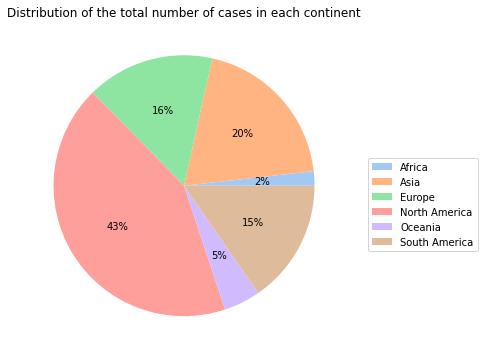

In [19]:
#Figure 1
#Plotting a pie chart in order to see how the cases of Covid are distributed each continent
#This vizualization helps us understand how affected each continent was from the pandemic


fig = plt.figure()
fig.set_size_inches(8.5, 6)

colors = sns.color_palette('pastel')
plt.title('Distribution of the total number of cases in each continent')

plt.pie(df2, colors = colors, autopct='%.0f%%')
plt.legend(df2.index, loc='upper left', bbox_to_anchor = (1.05, 0.6))
plt.show()

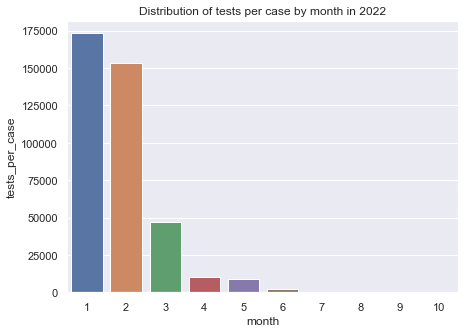

In [137]:
#a bar graph to see the distribution of tests in the year 2022
df5 = df[df['year'] == 2022]
df5 = df5.groupby(['month'])['tests_per_case'].max().reset_index()

sns.set(rc = {'figure.figsize':(7,5)})
d= sns.barplot(data=df5, x='month', y='tests_per_case').set(title='Distribution of tests per case by month in 2022')
plt.show()

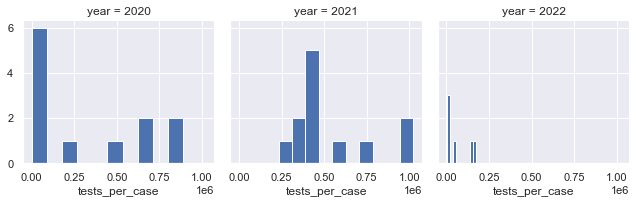

In [143]:
#To see the distribution of tests per case in different years, so as to see the trend of how we faced covid and how prepared we became
df5 = df.groupby(['year','month'])['tests_per_case'].max().reset_index()

q = sns.FacetGrid(data= df5, col = 'year')
q.map(plt.hist, 'tests_per_case')

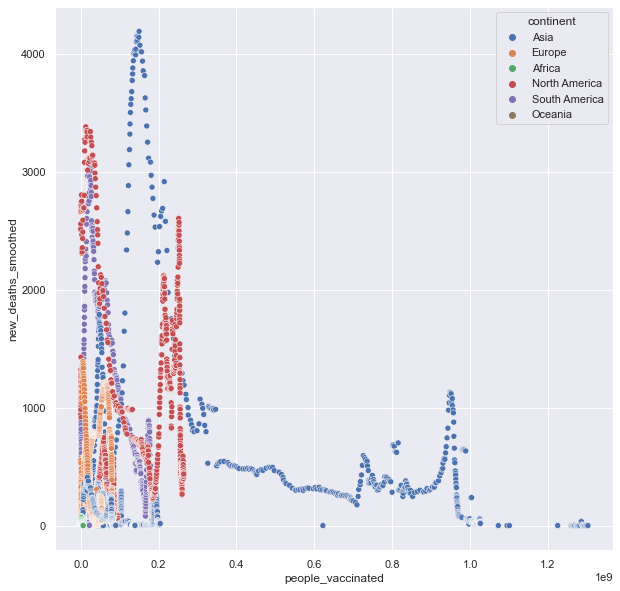

In [149]:
#A scatterplot to see how the vaccination of people affected the new deaths

sns.set(rc = {'figure.figsize':(10,10)})
sns.scatterplot(data=df, x='people_vaccinated', y='new_deaths_smoothed',hue='continent')
plt.show()

<AxesSubplot:>

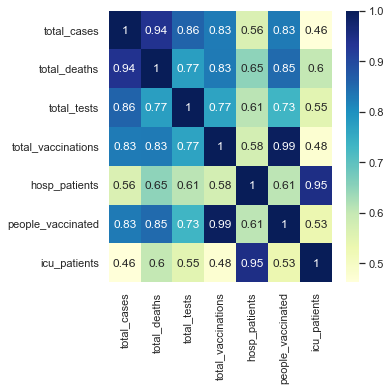

In [160]:
#A heat map so as to establish the correlation the parameters choses, and how they changed with vaccination

sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(df[['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations', 'hosp_patients','people_vaccinated',
              'icu_patients']].corr(), cmap="YlGnBu", annot=True)


Text(0.5, 1.0, 'Distribution of the total deaths in the world')

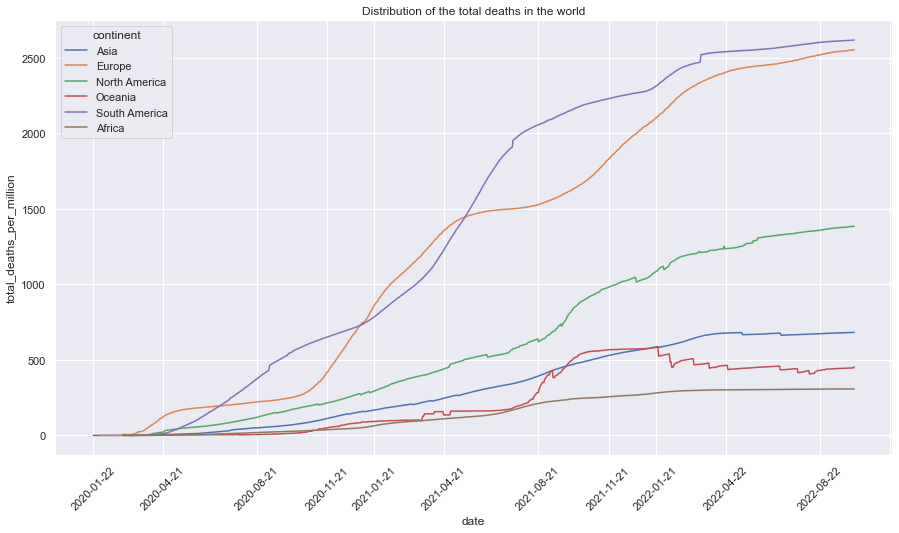

In [175]:
#This figure shows the total deaths by million over time in each continent. 

df6 = df.groupby(['date','continent'])['total_deaths_per_million'].mean().reset_index()
df6.dropna(inplace = True)
from datetime import datetime, timedelta
import matplotlib.dates as mdates

plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df6, x='date', y='total_deaths_per_million', hue='continent')

ax.set_xticks(ax.get_xticks())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 8, 11)))
plt.xticks(rotation=45)

plt.title('Distribution of the total deaths in the world')



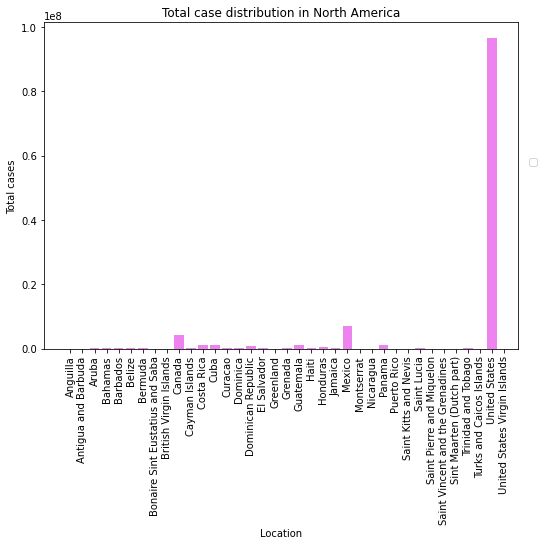

In [52]:
df4 = df[df['continent'] == 'North America']
fig = plt.figure()
fig.set_size_inches(8.5, 6)


location = df4['location'].dropna().unique().tolist()
caseList = df4.groupby(df4['location']).total_cases.max().values
plt.title('Total case distribution in North America')
plt.legend(location, bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Total cases")
plt.bar(location , caseList, color = "violet")
plt.show()

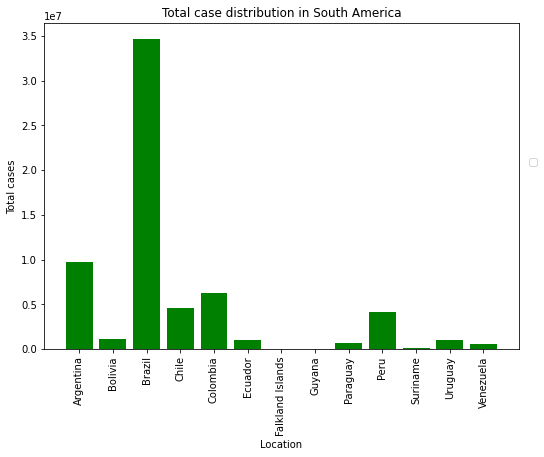

In [55]:
df4 = df[df['continent'] == 'South America']
fig = plt.figure()
fig.set_size_inches(8.5, 6)


location = df4['location'].dropna().unique().tolist()
caseList = df4.groupby(df4['location']).total_cases.max().values
plt.title('Total case distribution in South America')
plt.legend(location, bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Total cases")
plt.bar(location , caseList, color = "green")
plt.show()

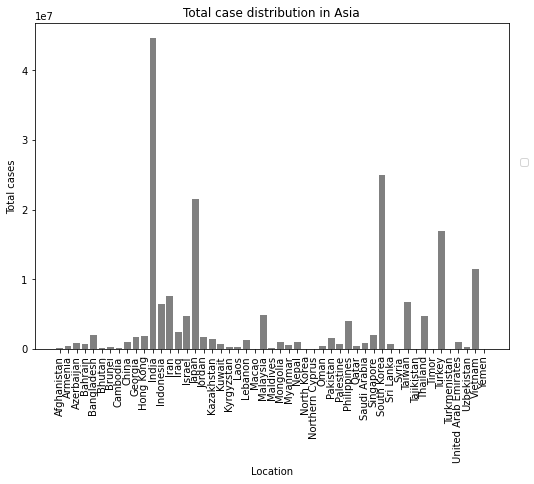

In [53]:
df4 = df[df['continent'] == 'Asia']
fig = plt.figure()
fig.set_size_inches(8.5, 6)


location = df4['location'].dropna().unique().tolist()
caseList = df4.groupby(df4['location']).total_cases.max().values
plt.title('Total case distribution in Asia')
plt.legend(location, bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Total cases")
plt.bar(location , caseList, color = "grey")
plt.show()

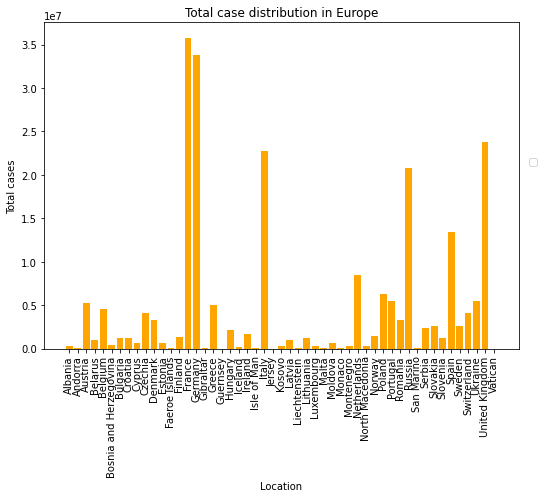

In [56]:
df4 = df[df['continent'] == 'Europe']
fig = plt.figure()
fig.set_size_inches(8.5, 6)


location = df4['location'].dropna().unique().tolist()
caseList = df4.groupby(df4['location']).total_cases.max().values
plt.title('Total case distribution in Europe')
plt.legend(location, bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Total cases")
plt.bar(location , caseList, color = "orange")
plt.show()

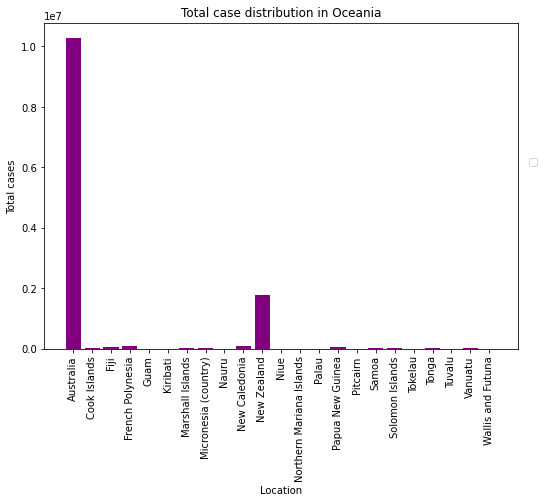

In [54]:
df4 = df[df['continent'] == 'Oceania']
fig = plt.figure()
fig.set_size_inches(8.5, 6)


location = df4['location'].dropna().unique().tolist()
caseList = df4.groupby(df4['location']).total_cases.max().values
plt.title('Total case distribution in Oceania')
plt.legend(location, bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Total cases")
plt.bar(location , caseList, color = "purple")
plt.show()

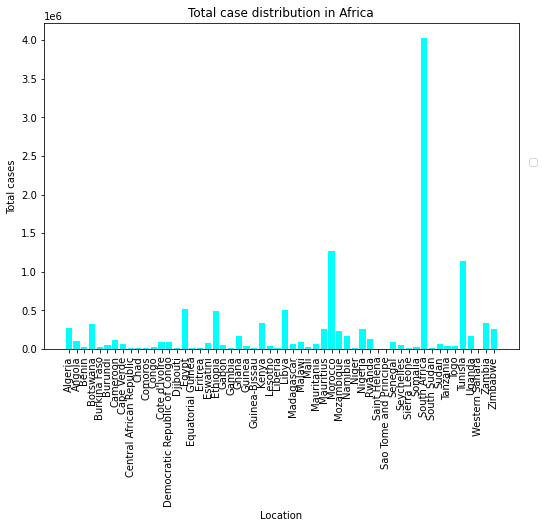

In [57]:
df4 = df[df['continent'] == 'Africa']

fig = plt.figure()
fig.set_size_inches(8.5, 6)


location = df4['location'].dropna().unique().tolist()
caseList = df4.groupby(df4['location']).total_cases.max().values
plt.title('Total case distribution in Africa')
plt.legend(location, bbox_to_anchor = (1.05, 0.6))
plt.xticks(rotation = 90)
plt.xlabel("Location")
plt.ylabel("Total cases")
plt.bar(location , caseList, color = "cyan")
plt.show()